In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the dataset
dataset = pd.read_csv('Game Behavior and Spending.csv')

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Remove leading and trailing whitespaces from all string columns
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Preprocess and one-hot encode the 'Gaming_Platforms' column
dataset['Gaming_Platforms'] = dataset['Gaming_Platforms'].str.lower()
dataset['Gaming_Platforms'] = dataset['Gaming_Platforms'].replace(' ', '')
one_hot_encoded_gaming_platforms  = dataset['Gaming_Platforms'].str.get_dummies(',')

# Preprocess and one-hot encode the 'Played_Games' column
dataset['Played_Games'] = dataset['Played_Games'].str.lower()
dataset['Played_Games'] = dataset['Played_Games'].replace(' ', '')
one_hot_encoded_played_games  = dataset['Played_Games'].str.get_dummies(',')

# Preprocess and one-hot encode the 'Course/Strand' column
dataset['Course/Strand'] = dataset['Course/Strand'].str.lower()
dataset['Course/Strand'] = dataset['Course/Strand'].replace(' ', '')
one_hot_encoded_course_strand  = dataset['Course/Strand'].str.get_dummies(',')

# Preprocess and one-hot encode the 'Monthly_Gaming_Budget' column
dataset['Monthly_Gaming_Budget'] = dataset['Monthly_Gaming_Budget'].str.lower()
dataset['Monthly_Gaming_Budget'] = dataset['Monthly_Gaming_Budget'].replace(' ', '')
one_hot_encoded_Monthly_Gaming_Budget  = dataset['Monthly_Gaming_Budget'].str.get_dummies(',')

# Get the number of columns for each one-hot encoded DataFrame
one_hot_encoded_gaming_platforms_num_columns = one_hot_encoded_gaming_platforms.shape[1]
one_hot_encoded_played_games_num_columns = one_hot_encoded_played_games.shape[1]
one_hot_encoded_course_strand_num_columns = one_hot_encoded_course_strand.shape[1]
one_hot_encoded_Monthly_Gaming_Budget_num_columns = one_hot_encoded_Monthly_Gaming_Budget.shape[1]

# Get the column names for each one-hot encoded DataFrame
one_hot_encoded_gaming_platforms_columns = one_hot_encoded_gaming_platforms.columns.tolist()
one_hot_encoded_played_games_columns = one_hot_encoded_played_games.columns.tolist()
one_hot_encoded_course_strand_columns = one_hot_encoded_course_strand.columns.tolist()
one_hot_encoded_Monthly_Gaming_Budget_columns = one_hot_encoded_Monthly_Gaming_Budget.columns.tolist()

# Get the maximum length of comma-separated values for each column
one_hot_encoded_gaming_platforms_max_length = dataset['Gaming_Platforms'].apply(lambda x: len(str(x).split(','))).max()
one_hot_encoded_played_games_max_length = dataset['Played_Games'].apply(lambda x: len(str(x).split(','))).max()
one_hot_encoded_course_strand_max_length = dataset['Course/Strand'].apply(lambda x: len(str(x).split(','))).max()
one_hot_encoded_Monthly_Gaming_Budget_max_length = dataset['Monthly_Gaming_Budget'].apply(lambda x: len(str(x).split(','))).max()

# Concatenate the one-hot encoded DataFrames to create the feature matrix X
features = pd.concat([one_hot_encoded_course_strand, one_hot_encoded_gaming_platforms, one_hot_encoded_Monthly_Gaming_Budget], axis=1)

# Assign the one-hot encoded 'Played_Games' DataFrame to the target variable y
target_variable = one_hot_encoded_played_games

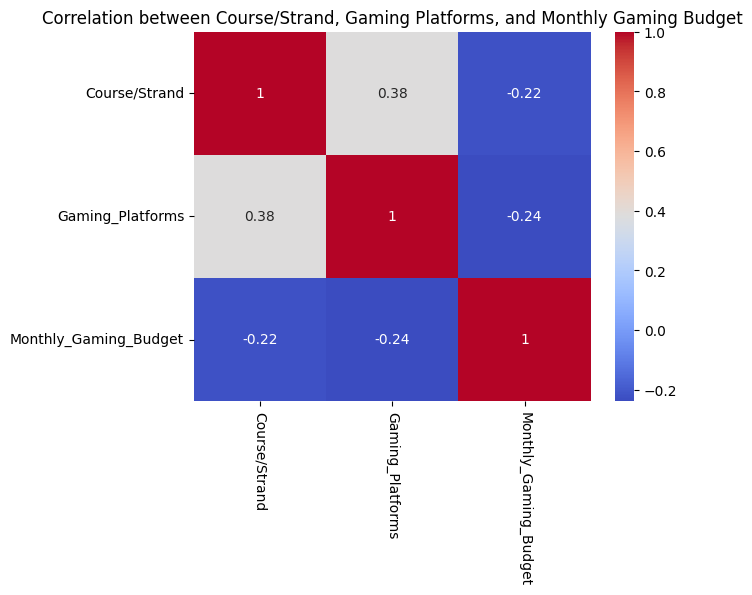

In [3]:
# Create a heatmap for the correlation between Course/Strand, Gaming Platforms, and Monthly Gaming Budget

import seaborn as sns

# Create a heatmap for the correlation between course/Strand, gaming platforms, and monthly gaming budget
corr = dataset[['Course/Strand', 'Gaming_Platforms', 'Monthly_Gaming_Budget']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')
plt.title('Correlation between Course/Strand, Gaming Platforms, and Monthly Gaming Budget')
plt.xticks(rotation=-90)
plt.show()

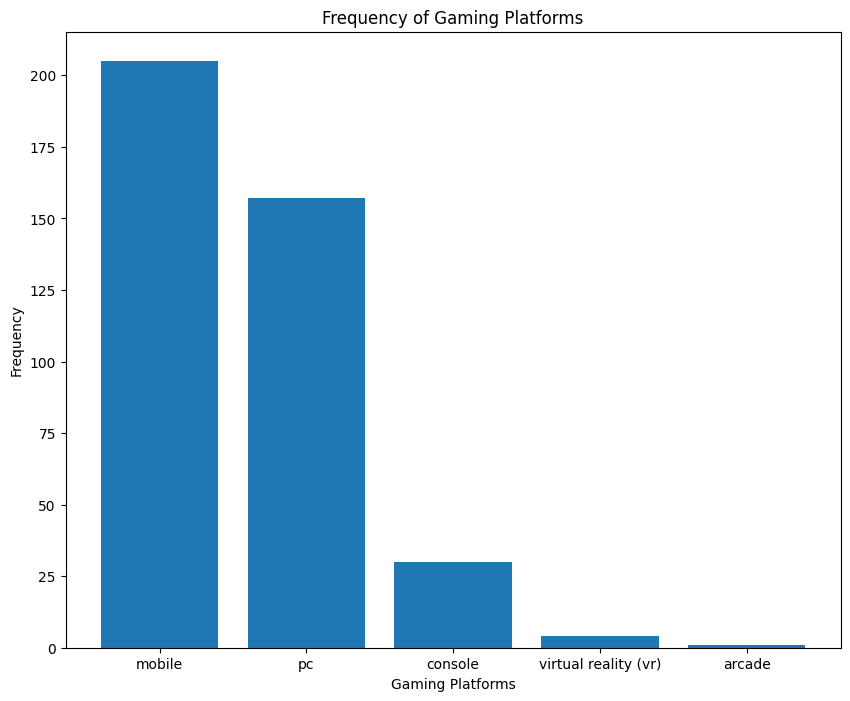

In [4]:
# Count the frequency of gaming platforms
gaming_platforms = dataset['Gaming_Platforms'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for gaming platforms
plt.figure(figsize=(10, 8))
plt.bar(gaming_platforms.index, gaming_platforms.values)
plt.title('Frequency of Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.ylabel('Frequency')
plt.show()

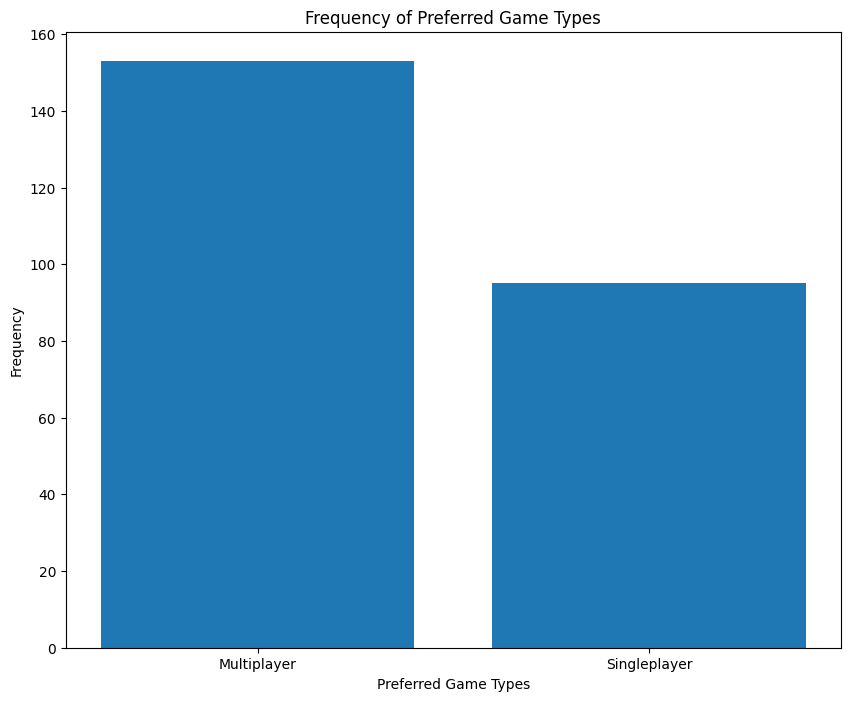

In [5]:
# Count the frequency of preferred game types
preferred_game_types = dataset['Preferred_Game_Type'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred game types
plt.figure(figsize=(10, 8))
plt.bar(preferred_game_types.index, preferred_game_types.values)
plt.title('Frequency of Preferred Game Types')
plt.xlabel('Preferred Game Types')
plt.ylabel('Frequency')
plt.show()

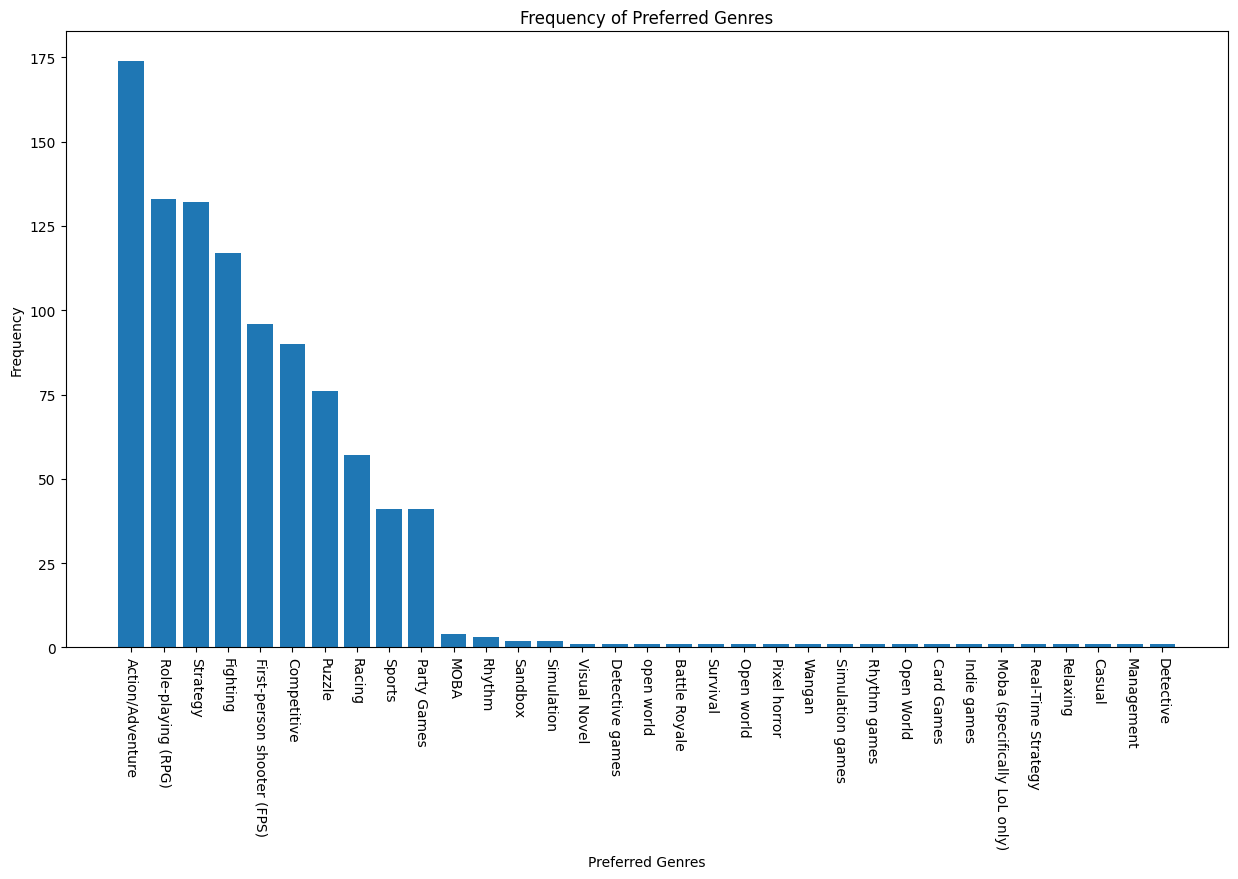

In [6]:
# Count the frequency of preferred genres
preferred_genres = dataset['Preferred_Genres'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for preferred genres
plt.figure(figsize=(15, 8))
plt.bar(preferred_genres.index, preferred_genres.values)
plt.title('Frequency of Preferred Genres')
plt.xlabel('Preferred Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=-90)
plt.show()

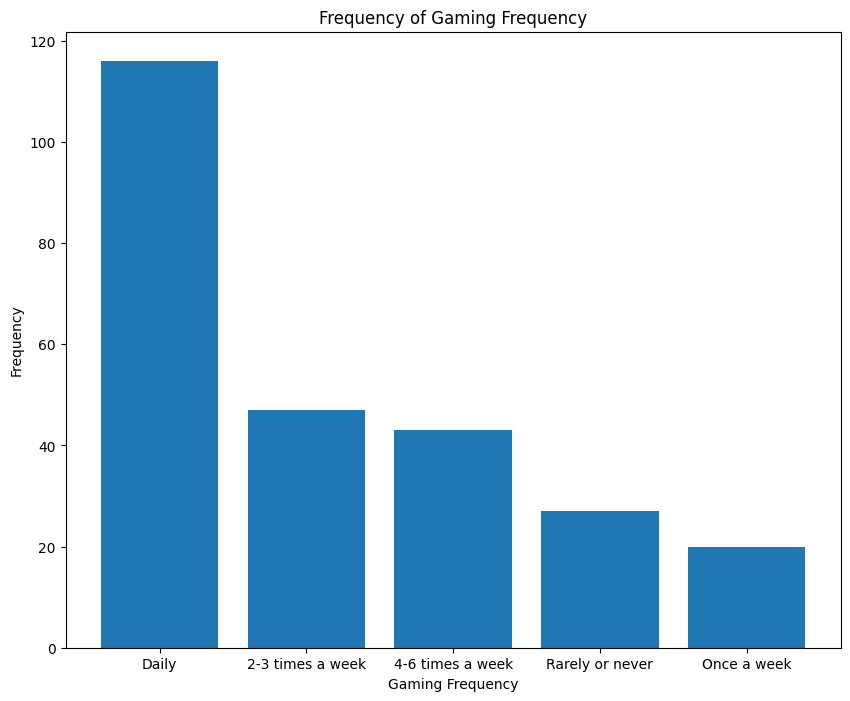

In [7]:
# Count the frequency of gaming frequency
Gaming_Frequency = dataset['Gaming_Frequency'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for gaming frequency
plt.figure(figsize=(10, 8))
plt.bar(Gaming_Frequency.index, Gaming_Frequency.values)
plt.title('Frequency of Gaming Frequency')
plt.xlabel('Gaming Frequency')
plt.ylabel('Frequency')
plt.show()

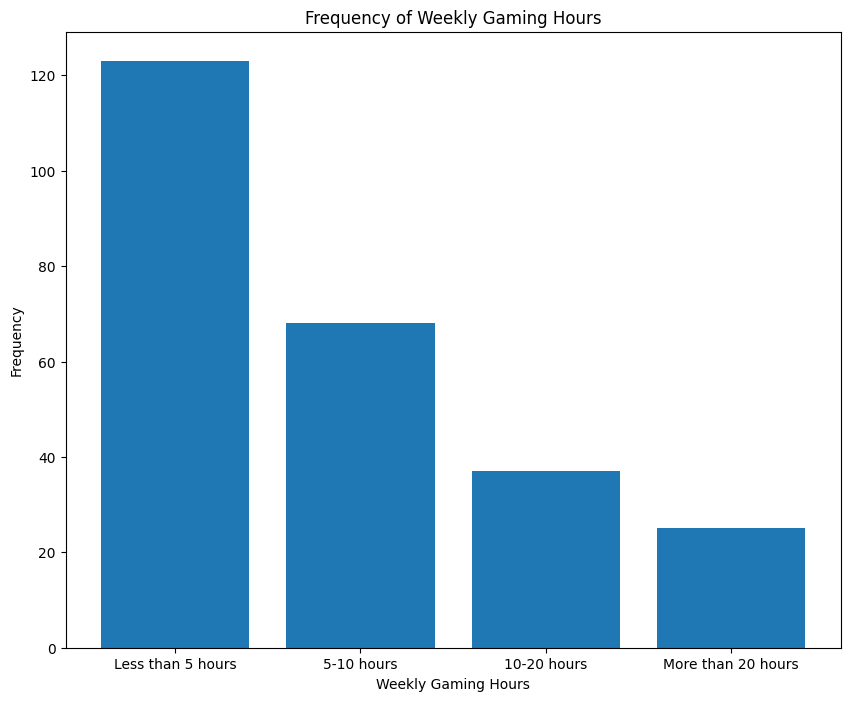

In [8]:
# Count the frequency of weekly gaming hours
Weekly_Gaming_Hours = dataset['Weekly_Gaming_Hours'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for weekly gaming hours
plt.figure(figsize=(10, 8))
plt.bar(Weekly_Gaming_Hours.index, Weekly_Gaming_Hours.values)
plt.title('Frequency of Weekly Gaming Hours')
plt.xlabel('Weekly Gaming Hours')
plt.ylabel('Frequency')
plt.show()

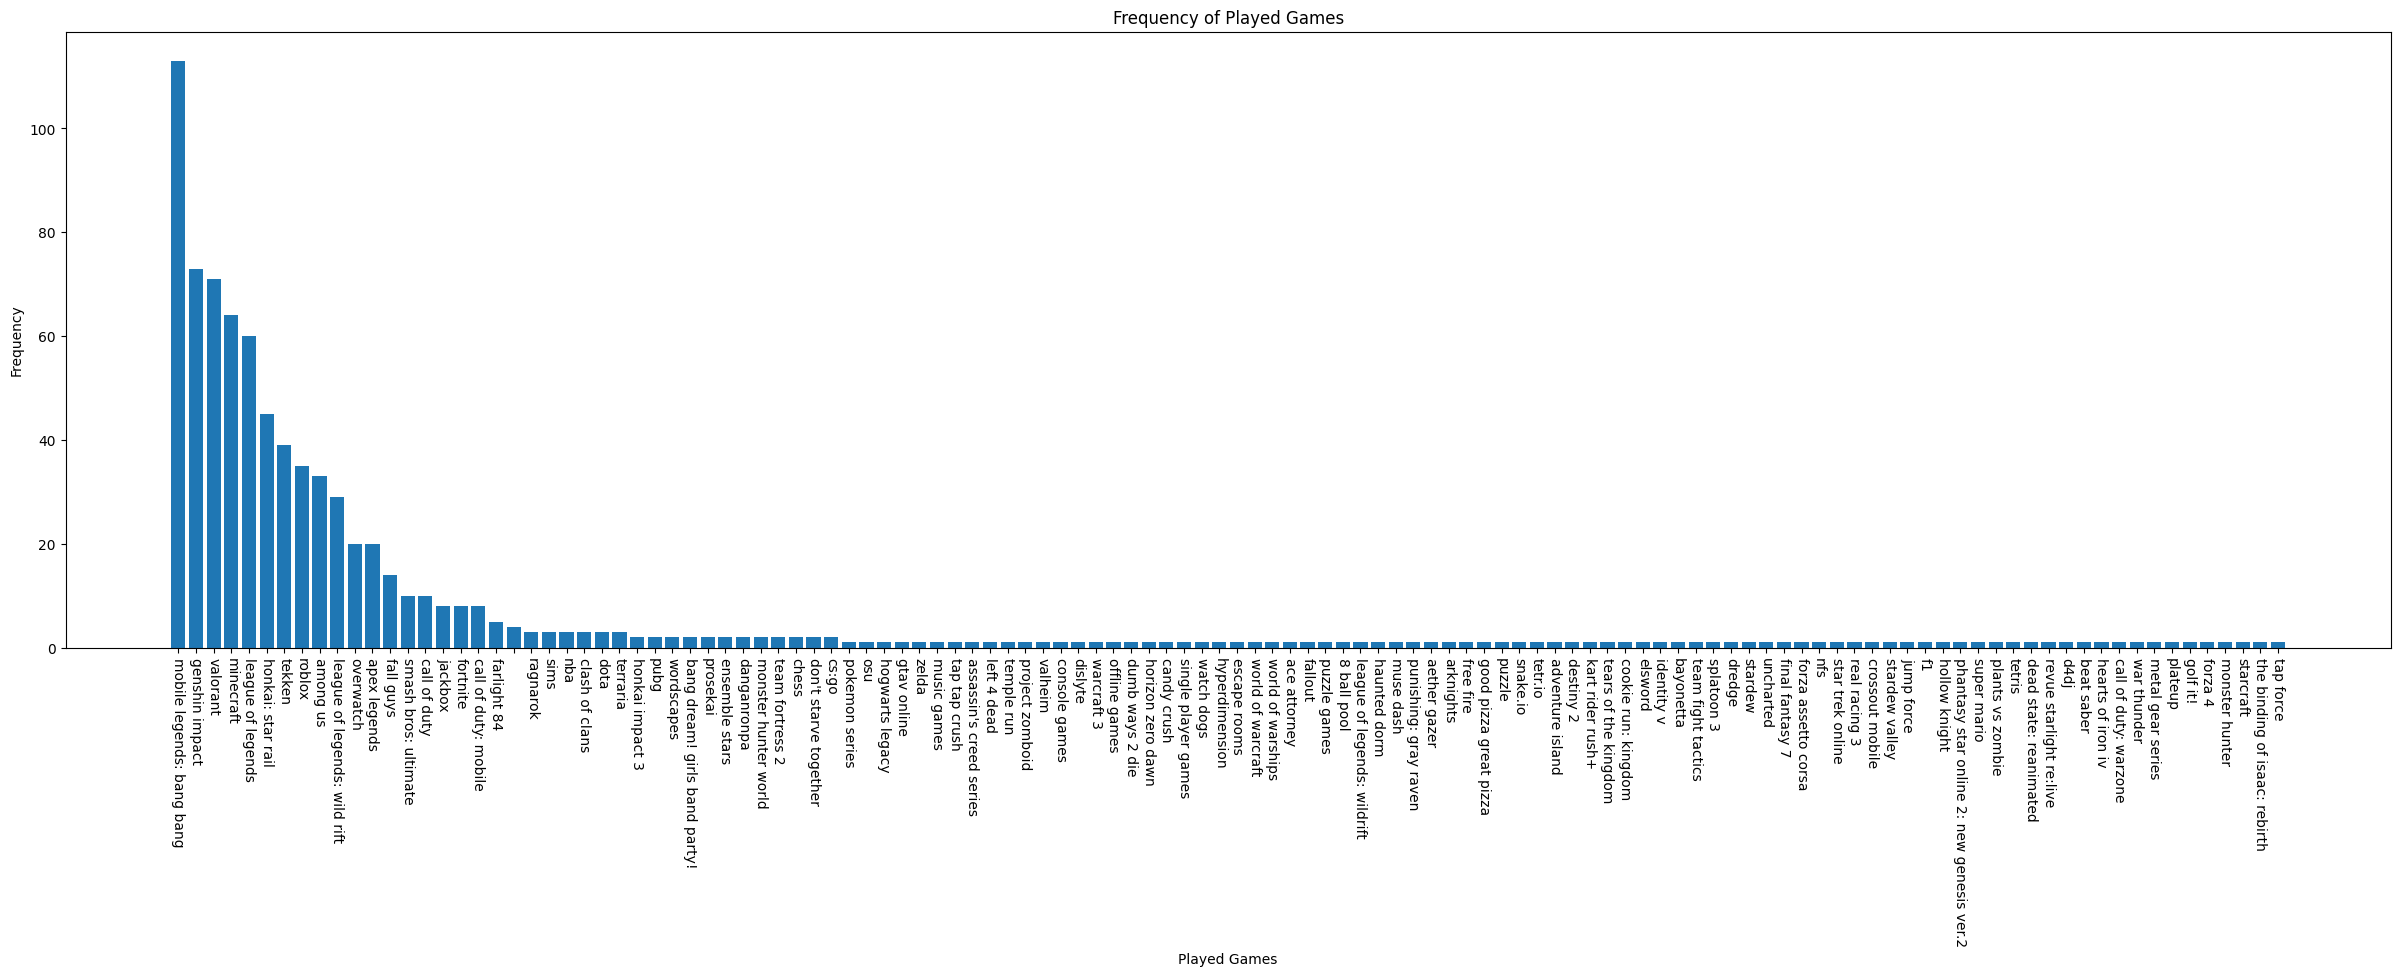

In [9]:
# Count the frequency of played games
Played_Games = dataset['Played_Games'].str.split(',', expand=True).stack().value_counts()

# Create a bar chart for played games
plt.figure(figsize=(30, 8))
plt.bar(Played_Games.index, Played_Games.values)
plt.title('Frequency of Played Games')
plt.xlabel('Played Games')
plt.ylabel('Frequency')
plt.xticks(rotation=-90)
plt.show()

In [10]:
# Split the data set into Training and Test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features
                                                , target_variable
                                                , test_size = 0.35
                                                , random_state = 0)

In [11]:
# Normalization of data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Identify rows in y_train and y_test where at least one element is non-zero
rows_to_keep = (y_train != 0).any(axis=0)

# Filter y_train and y_test to keep only the columns identified by rows_to_keep
y_train_filtered = y_train.loc[:, rows_to_keep]
y_test_filtered = y_test.loc[:, rows_to_keep]

In [13]:
# User input to determine Classifer to use

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

invalid_input = True
checkLogReg = False
# Loop until valid input is provided
while invalid_input:
    # User input
    comparison_input = input(
        "Choose a model (knn or logistic):\n"
        "a. KNN\n"
        "b. Logistic\n"
    )
    match comparison_input:
        # If the user chooses 'A' or 'a' (KNN)
        case 'A'| 'a':
            invalid_input = False

            # Create a KNN classifier with MultiOutputClassifier for multi-label classification
            classifier = MultiOutputClassifier(KNeighborsClassifier (n_neighbors=5))
            classifier.fit(X_train, y_train_filtered)

        # If the user chooses 'B' or 'b' (Logistic Regression)
        case 'B'| 'b':
            invalid_input = False
            checkLogReg = True

            # Select columns in y_train that have at least one non-zero value
            y_train_filtered = y_train.loc[:, (y_train != 0).any(axis=0)]

            # Create a Logistic Regression classifier with MultiOutputClassifier for multi-label classification
            classifier = MultiOutputClassifier(LogisticRegression(random_state = 0, max_iter=10000))
            classifier.fit(X_train, y_train_filtered)


In [14]:
# Predict using the classifier on the training set
y_pred_train = classifier.predict(X_train)

# Concatenate the predicted values and the actual values
print(np.concatenate((y_pred_train, y_train_filtered.to_numpy()), axis=1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
# Predict using the classifier on the test set
y_pred_test = classifier.predict(X_test)

# Concatenate the predicted values and the actual values
print(np.concatenate((y_pred_test, y_test_filtered.to_numpy()), axis=1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
# Accuracy Scores

print("Accuracy Scores for training prediction and training data:", accuracy_score(y_pred_train, y_train_filtered))
print("")
print("Accuracy Scores for test prediction and test data:", accuracy_score(y_pred_test, y_test_filtered))

Accuracy Scores for training prediction and training data: 0.17073170731707318

Accuracy Scores for test prediction and test data: 0.15730337078651685


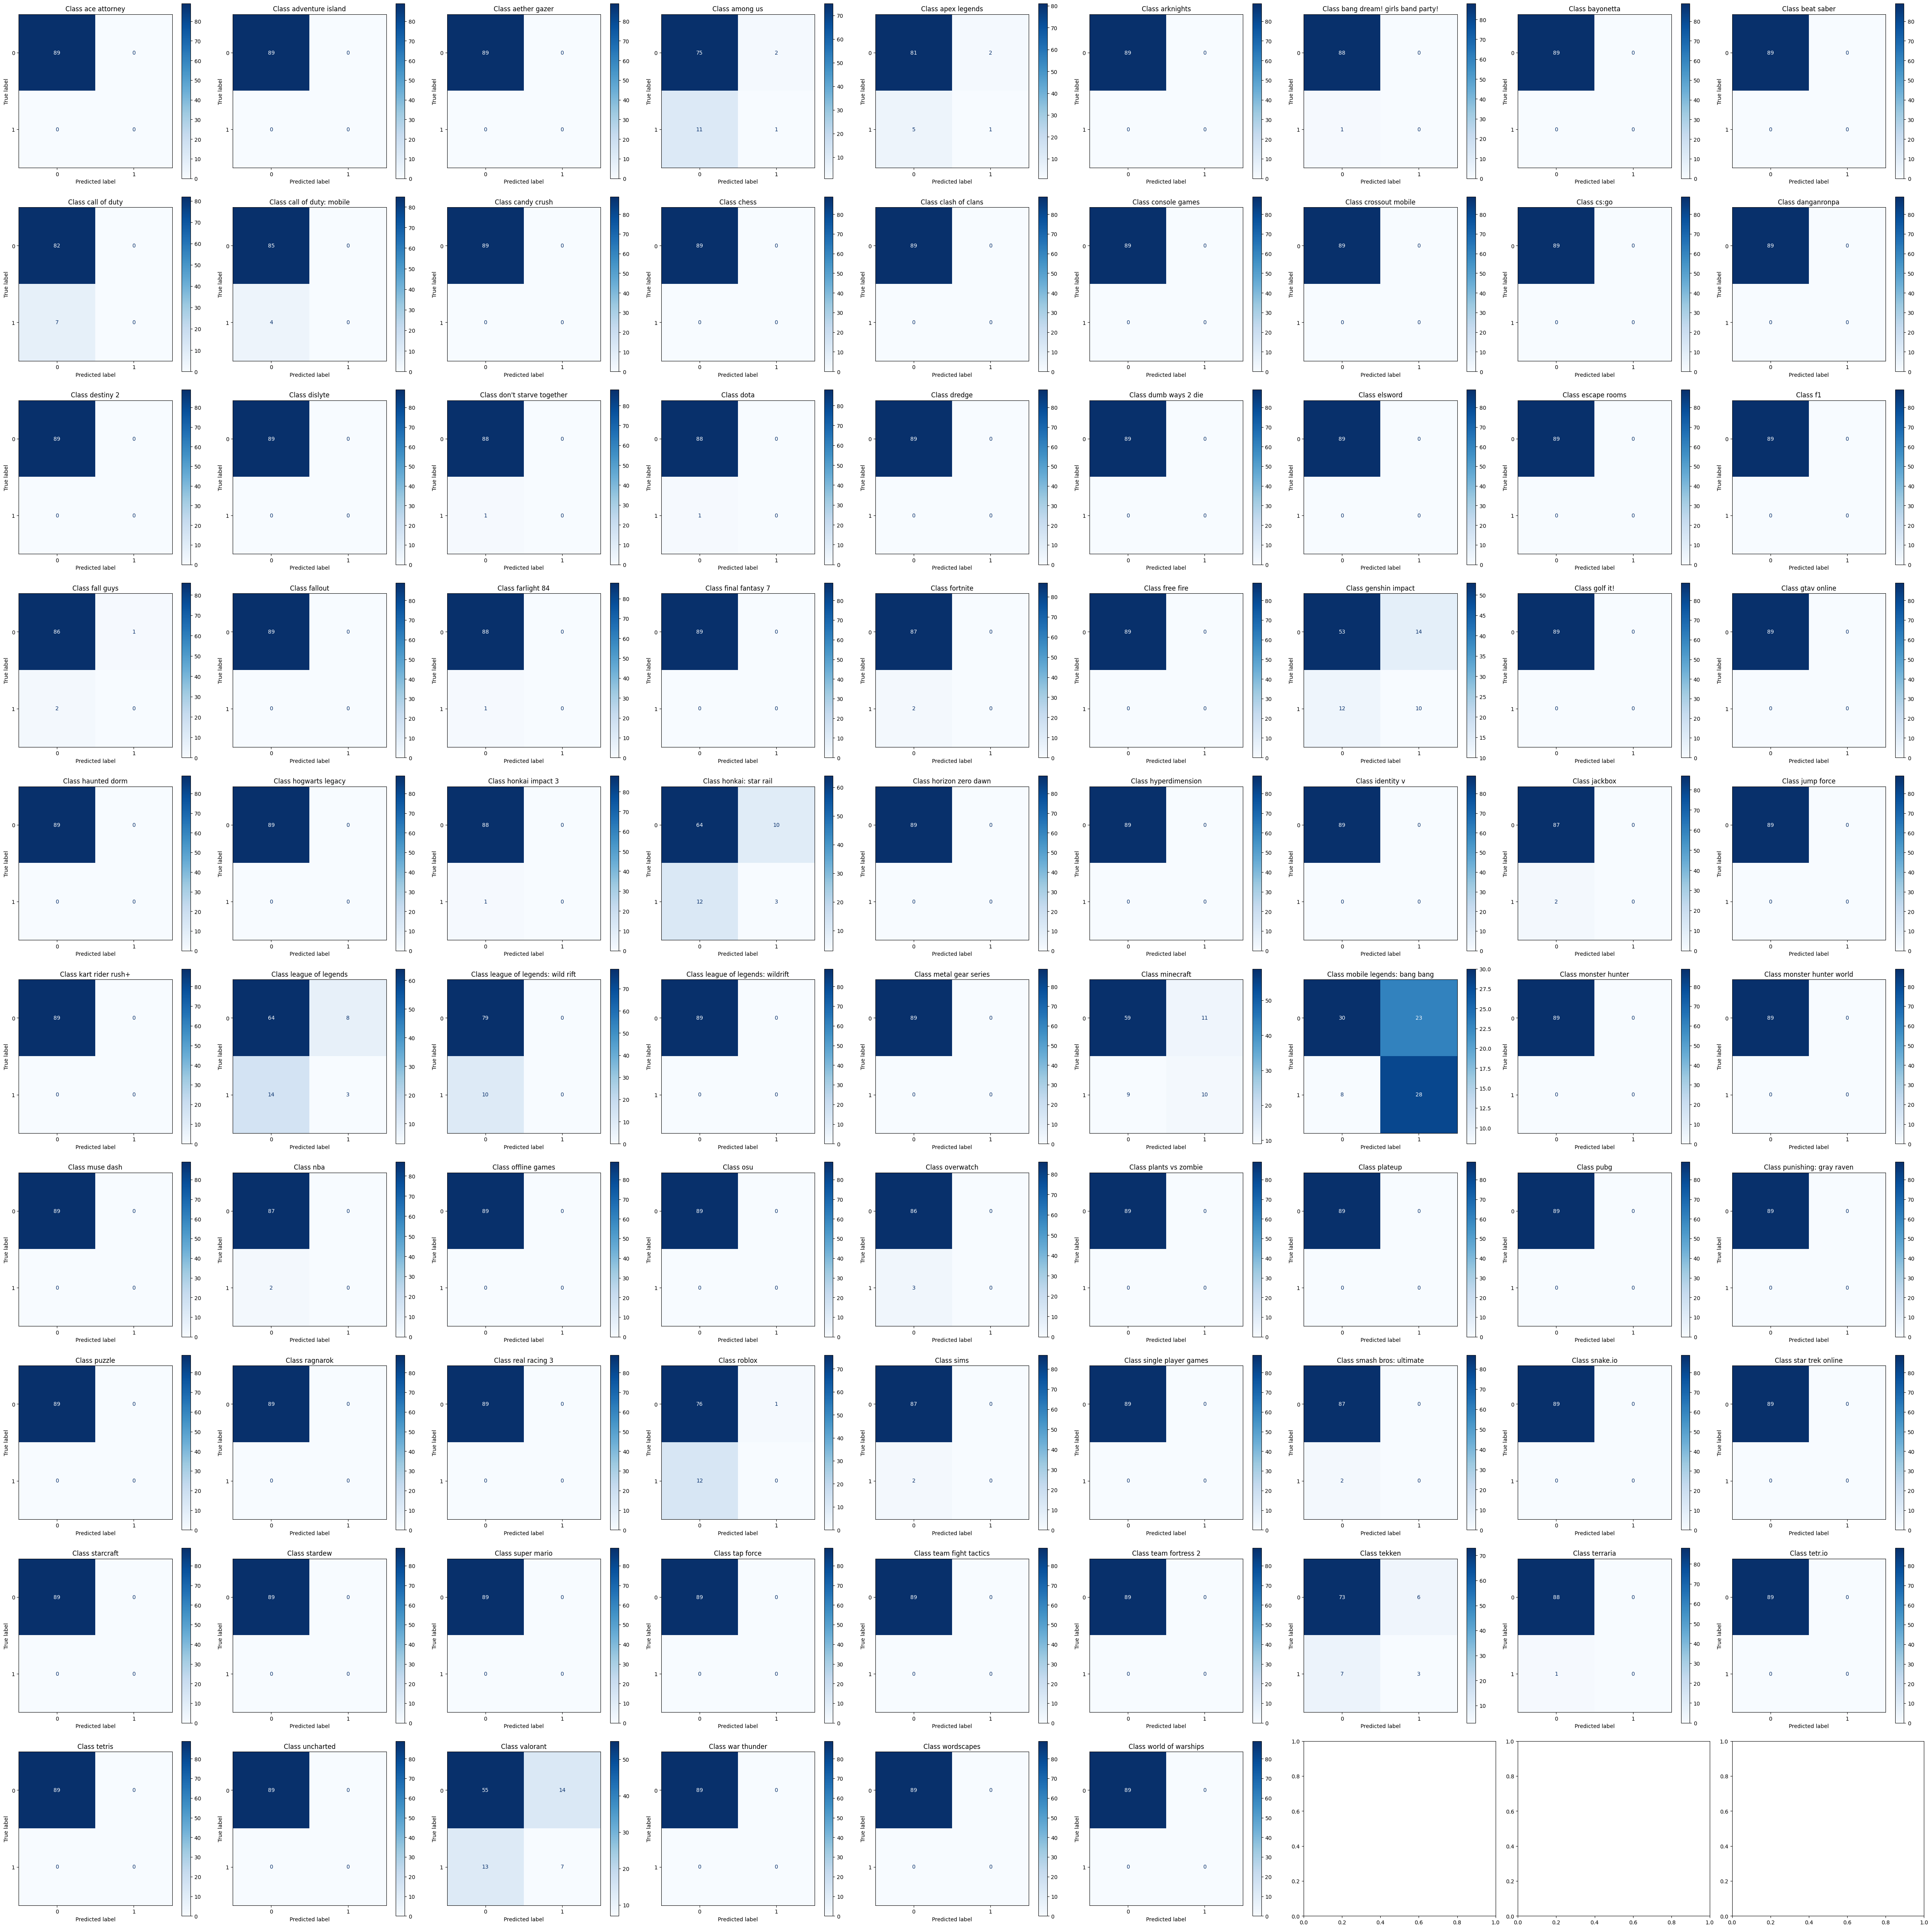

In [17]:
# Plot Confusion Matrices

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Compute multilabel confusion matrices comparing the true labels (y_test) with predicted labels (y_pred)
confusion_matrices = multilabel_confusion_matrix(y_test_filtered, y_pred_test)

# Extract headers (column names) corresponding to the kept rows in y_train
headers = target_variable.columns[rows_to_keep]

# Determine the number of rows and columns for subplots
num_rows = 10
num_columns = len(confusion_matrices) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(50, 50))

# Flatten the axes array if there is more than one row
if num_rows > 1:
    axes = axes.flatten()

# Plot confusion matrices
for i, (confusion_matrix, class_name) in enumerate(zip(confusion_matrices, headers)):
    row_idx = i // num_columns
    col_idx = i % num_columns
    display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['0', '1'])
    display.plot(cmap='Blues', values_format='d', ax=axes[i])
    axes[i].set_title(f'Class {class_name}')

plt.tight_layout()
plt.show()

In [18]:
def get_user_inputs(one_hot_encoded_data, max_length, num_columns):

    # Initialize an empty list to store user inputs
    user_inputs = []

    # Continue getting user inputs until the maximum length is reached or the user decides to stop
    while len(user_inputs) < max_length:
        try:
            # Prompt the user to enter a number or 'N' to end
            value = input(f"Enter a number (1-{num_columns}) or 'N' to end: ")

            # If the user enters 'N', exit the loop
            if value.lower() == 'n':
                break

            # Convert the input to an integer
            number = int(value)

            # Check if the entered number is within the valid range
            if 1 <= number <= num_columns:
                # Check for duplicate inputs
                if number not in user_inputs:
                    user_inputs.append(number)
                else:
                    print("Duplicate input. Please enter a unique number.")
            else:
                print(f"Please enter a number between 1 and {num_columns}.")
        except ValueError:
            print("Invalid input. Please enter a valid number or 'stop'.")

    # Get corresponding column names for the selected numbers
    corresponding_values = [one_hot_encoded_data.columns.tolist()[i - 1] for i in user_inputs]

    # Create a DataFrame for user inputs
    df_user_inputs = pd.DataFrame({col: 0 for col in one_hot_encoded_data.columns}, index=[0])

    # Set the corresponding values to 1
    df_user_inputs.loc[0, corresponding_values] = 1

    return df_user_inputs

In [19]:
# Enumerate through the gaming platform columns then print the index and the gaming platform choice
for index, choice in enumerate(one_hot_encoded_gaming_platforms_columns, start=1):
    print(f"{index}. {choice}")

1. arcade
2. console
3. mobile
4. pc
5. virtual reality (vr)


In [20]:
# Get the user input for Gaming Platforms
one_hot_encoded_gaming_platforms_input = get_user_inputs(one_hot_encoded_gaming_platforms, one_hot_encoded_gaming_platforms_max_length, one_hot_encoded_gaming_platforms_num_columns)

Duplicate input. Please enter a unique number.
Duplicate input. Please enter a unique number.


In [21]:
# Enumerate through the course/strand columns then print the index and the course/strand choice
for index, choice in enumerate(one_hot_encoded_course_strand_columns, start=1):
    print(f"{index}. {choice}")

1. accountancy business and management
2. bachelor in multimedia arts
3. bachelor in multimedia arts major in animation
4. bachelor of arts in biology
5. bachelor of arts in english language studies
6. bachelor of science in architecture
7. bachelor of science in computer engineering
8. bachelor of science in computer science
9. bachelor of science in electrical engineering
10. bachelor of science in electronics engineering
11. bachelor of science in entertainment and multimedia computing
12. bachelor of science in entrepreneurship
13. bachelor of science in environmental planning
14. bachelor of science in industrial engineering
15. bachelor of science in information technology
16. bachelor of science in nursing
17. bachelor of science in psychology
18. doctor of veterinary medicine
19. fine arts major in visual communication
20. media and visual arts
21. programming
22. working


In [22]:
# Get the user input for Course/Strand
one_hot_encoded_course_strand_input = get_user_inputs(one_hot_encoded_course_strand, one_hot_encoded_course_strand_max_length, one_hot_encoded_course_strand_num_columns)

In [23]:
# Enumerate through the monthly gaming budget columns then print the index and the monthly gaming budget choice
for index, choice in enumerate(one_hot_encoded_Monthly_Gaming_Budget_columns, start=1):
        print(f"{index}. {choice}")

1. 1 - 500 php
2. 1000 - 5000 php
3. 500 - 1000 php
4. 5000+ php
5. none.


In [24]:
# Get the user input for Gaming Budget
one_hot_encoded_Monthly_Gaming_Budget_input = get_user_inputs(one_hot_encoded_Monthly_Gaming_Budget, one_hot_encoded_Monthly_Gaming_Budget_max_length, one_hot_encoded_Monthly_Gaming_Budget_num_columns)

In [25]:
# Concatenate one-hot encoded user inputs
user_inputs = np.concatenate([one_hot_encoded_gaming_platforms_input, one_hot_encoded_course_strand_input, one_hot_encoded_Monthly_Gaming_Budget_input], axis=1)

2). By getting the Course, the gaming console, and the expenditure, predict which GAME a user will most likely be playing. 

In [26]:
# Predict the result and the probabilities
predicted_result = classifier.predict(user_inputs)
predicted_classification_probabilities = classifier.predict_proba(user_inputs)

# Find the indices where the value is 1
indices_with_1 = np.where(predicted_result[0] == 1)[0]

In [27]:
# Print the corresponding headers
if len(indices_with_1) > 0:
    corresponding_headers = [headers[i] for i in indices_with_1]

In [28]:
# Print the predicted classification
print(f"The games with the highest probability of being played are: {corresponding_headers}")

# Calculate and print the accuracy of the model
print(f"Accuracy of the model:{(accuracy_score(y_test_filtered, classifier.predict(X_test)) * 100):.2f}%")

# Calculate and print the precision of the model
print(f"Precision of the model: {(precision_score(y_test_filtered, classifier.predict(X_test), average = 'weighted', zero_division=1) * 100):.2f}%")

# Calculate and print the recall of the model
print(f"Recall of the model: {(recall_score(y_test_filtered, classifier.predict(X_test), average = 'weighted', zero_division=1) * 100):.2f}%")

# Calculate and print the F1 Score of the model
print(f"F1 Score of the model: {(f1_score(y_test_filtered, classifier.predict(X_test), average = 'weighted', zero_division=1) * 100):.2f}%")

The games with the highest probability of being played are: ['league of legends', 'mobile legends: bang bang']
Accuracy of the model:15.73%
Precision of the model: 48.38%
Recall of the model: 31.28%
F1 Score of the model: 36.03%


Probability of being ace attorney played: 0.00%
Probability of being adventure island played: 0.00%
Probability of being aether gazer played: 0.00%
Probability of being among us played: 0.00%
Probability of being apex legends played: 0.00%
Probability of being arknights played: 0.00%
Probability of being bang dream! girls band party! played: 0.00%
Probability of being bayonetta played: 0.00%
Probability of being beat saber played: 0.00%
Probability of being call of duty played: 0.00%
Probability of being call of duty: mobile played: 0.00%
Probability of being candy crush played: 0.00%
Probability of being chess played: 0.00%
Probability of being clash of clans played: 20.00%
Probability of being console games played: 0.00%
Probability of being crossout mobile played: 0.00%
Probability of being cs:go played: 0.00%
Probability of being danganronpa played: 0.00%
Probability of being destiny 2 played: 0.00%
Probability of being dislyte played: 0.00%
Probability of being don't starve togeth

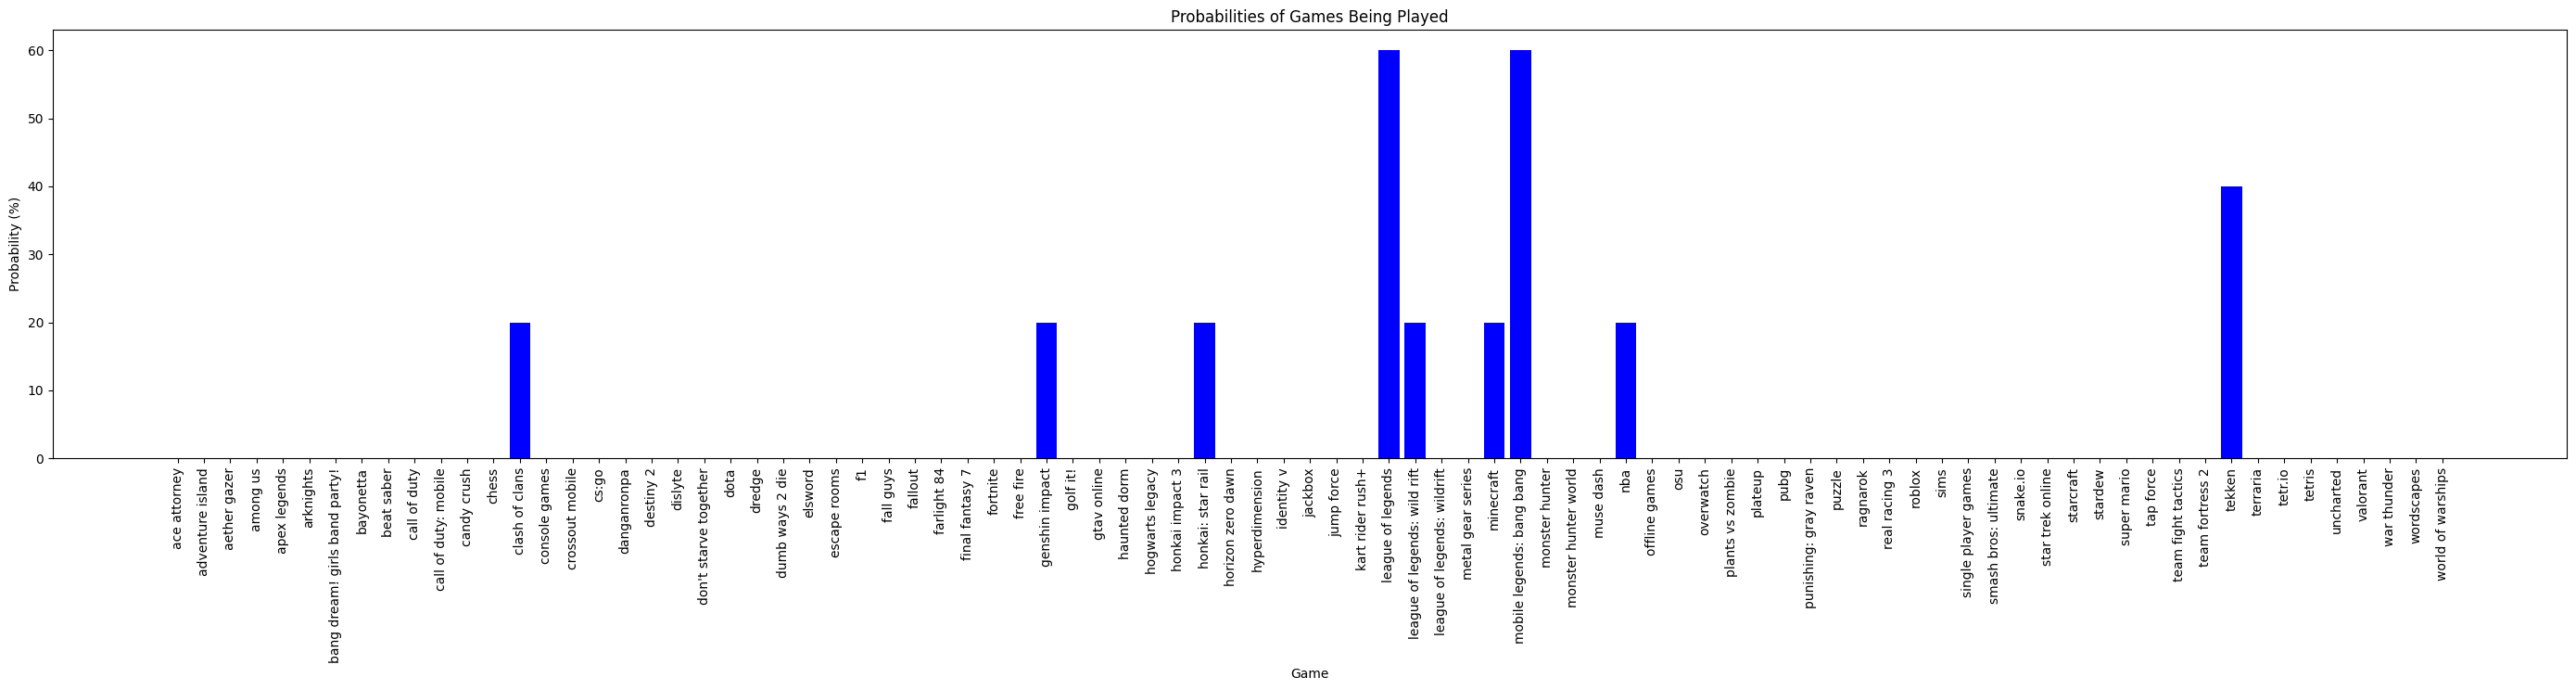

In [29]:
# Get Probabilities for Each Class

max_probability = 0
max_class = ""
probabilities = []

# Iterate through unique classes and their predicted probabilities
for class_name, probability_array in zip(np.unique(headers), predicted_classification_probabilities):
    # Check if the inner array has more than one element
    if len(probability_array[0]) > 1:
        probability = probability_array[0][1]
    else:
        probability = 0

    # Update max_class and max_probability if the current probability is higher
    if probability > max_probability:
        max_class = class_name
        max_probability = probability

    # Print the probability for each class
    print(f"Probability of being {class_name} played: {(probability * 100):.2f}%")

    # Append the probability to the list for plotting
    probabilities.append(probability * 100)

# Print the class with the highest probability
print(f"Game with the highest probability of being played: {max_class} with a probability of {(max_probability * 100):.2f}%")

# Create a bar graph to visualize probabilities for each class
plt.figure(figsize=(35, 6))
plt.bar(headers, probabilities, color='blue')
plt.xlabel('Game')
plt.ylabel('Probability (%)')
plt.title('Probabilities of Games Being Played')
plt.xticks(rotation=90)
plt.show()

Accuracy of the Models

KNN

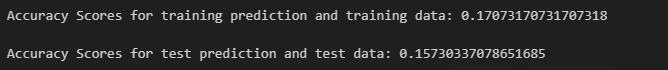

Logistic Regression

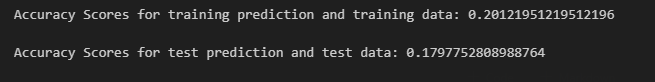

Which model is best suited for the problem?

The accuracy scores for the training and test data for both models are very low. This indicates both models are unreliable and will make inaccurate predictions. However, the accuracy scores do indicate that the Logistic regression will make more accurate predictions and so, with our pre-processing, we recommend choosing Logistic Regression to make prediction on the dataset.

Despite this, we recommend further consideration of which classifier model to use given the dataset as these models are highly unreliable and to further explore better data pre-processing actions.
